In [ ]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


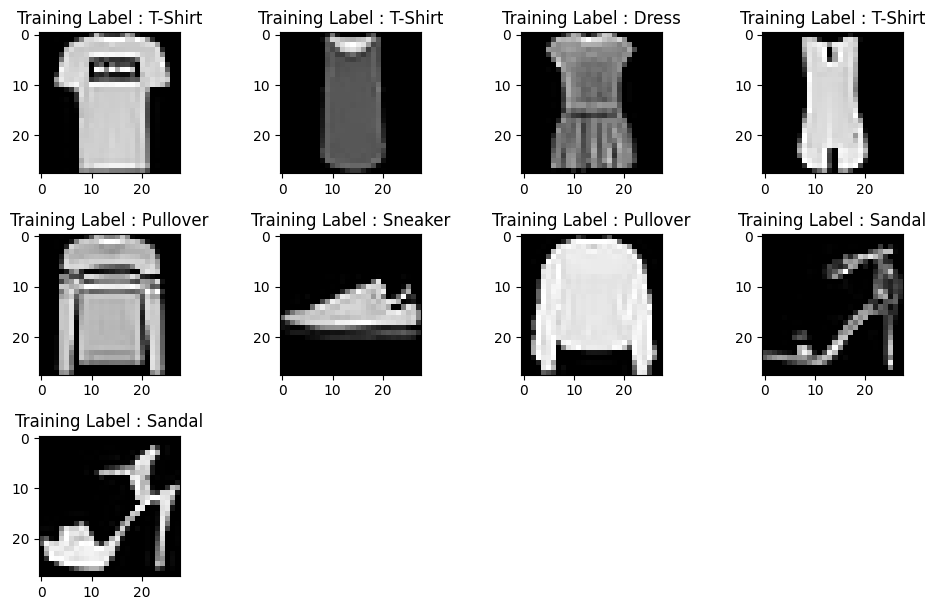

In [ ]:

labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot')
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(trainset.train_data[i].numpy(), cmap='gray')
    plt.title('Training Label : %s' % labels_map[trainset.train_labels[i]])
plt.show()

## الف

In [ ]:
input_size = 784
out_size = 10

In [ ]:
## Define the model
################ Your code ############
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, out_size)
)
#######################################

In [ ]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
#######################################

In [ ]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
## Train your model
epochs = 10

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:

    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()

    # forward pass
    ################ Your code ############
    output = model(images)
    loss = criterion(output,labels)
    #######################################

    loss.backward()
    optimizer.step()

    running_loss = running_loss+loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.528895646571986
Training loss: 0.3733053739899511
Training loss: 0.3306604126241924
Training loss: 0.3055156439479226
Training loss: 0.28475956373345623
Training loss: 0.2667613105256674
Training loss: 0.2537419886620187
Training loss: 0.23991119051411716
Training loss: 0.23032230584383773
Training loss: 0.2201931217808459


In [ ]:
## Test your model
# from d2l import torch as d2l
# d2l.predict_ch3(model,testloader,n = 10)
import matplotlib.pyplot as plt
import torch

def show_10_from_test_dataset(model, testloader):
  """Shows 10 images from the test dataset and their labels and predictions.

  Args:
    model: A PyTorch model.
    testloader: A PyTorch DataLoader for the test dataset.
  """

  # Get the first 10 images from the testloader
  images, labels = next(iter(testloader))

  # Make predictions on the images
  predictions = model(images)

  # Get the predicted labels
  _, predicted_labels = torch.max(predictions.data, 1)

  # Create a figure
  fig = plt.figure(figsize=(10, 10))

  # Add a subplot for each image
  for i in range(10):
    ax = fig.add_subplot(5, 2, i + 1)

    # Show the image
    image = images[i].cpu().numpy().squeeze()
    ax.imshow(image, cmap='gray')

    # Set the title of the subplot to the label and predicted label
    ax.set_title(f'Label: {labels[i]} Predicted: {predicted_labels[i]}')

  # Tighten the layout of the figure
  fig.tight_layout()

  # Show the figure
  plt.show()


def test(model, testloader):
  correct = 0
  total = 0
  total_loss = 0
  with torch.no_grad():
    for images, labels in testloader:
      images = images.view(images.shape[0], -1)
      output = model(images)
      loss = criterion(output, labels)
      total_loss += loss.item()
      _, predicted = torch.max(output.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  accuracy = 100 * correct / total
  average_loss = total_loss / len(testloader)

  return average_loss, accuracy


Accuracy: 85.42%
Average loss: 0.41


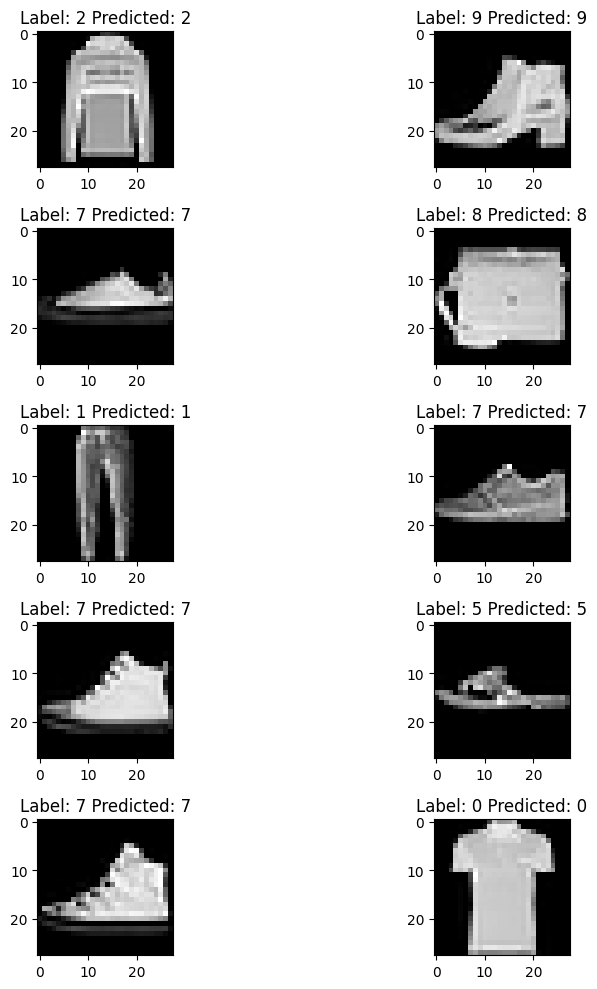

In [ ]:
# Test the model
average_loss_a, accuracy_a = test(model, testloader)
print(f'Accuracy: {accuracy_a:.2f}%')
print(f'Average loss: {average_loss_a:.2f}')
show_10_from_test_dataset(model, testloader)

## ب

Epoch 1/50, Train Loss: 2.1298, Test Loss: 1.6611
Epoch 2/50, Train Loss: 1.0537, Test Loss: 0.8479
Epoch 3/50, Train Loss: 0.6982, Test Loss: 0.6365
Epoch 4/50, Train Loss: 0.5630, Test Loss: 0.6015
Epoch 5/50, Train Loss: 0.4827, Test Loss: 0.5060
Epoch 6/50, Train Loss: 0.4327, Test Loss: 0.4512
Epoch 7/50, Train Loss: 0.4006, Test Loss: 0.5183
Epoch 8/50, Train Loss: 0.3736, Test Loss: 0.4022
Epoch 9/50, Train Loss: 0.3533, Test Loss: 0.3956
Epoch 10/50, Train Loss: 0.3353, Test Loss: 0.4780
Epoch 11/50, Train Loss: 0.3208, Test Loss: 0.4817
Epoch 12/50, Train Loss: 0.3088, Test Loss: 0.3600
Epoch 13/50, Train Loss: 0.2948, Test Loss: 0.3594
Epoch 14/50, Train Loss: 0.2830, Test Loss: 0.4178
Epoch 15/50, Train Loss: 0.2750, Test Loss: 0.4240
Epoch 16/50, Train Loss: 0.2640, Test Loss: 0.3795
Epoch 17/50, Train Loss: 0.2545, Test Loss: 0.4798
Epoch 18/50, Train Loss: 0.2456, Test Loss: 0.3527
Epoch 19/50, Train Loss: 0.2382, Test Loss: 0.4162
Epoch 20/50, Train Loss: 0.2279, Test Lo

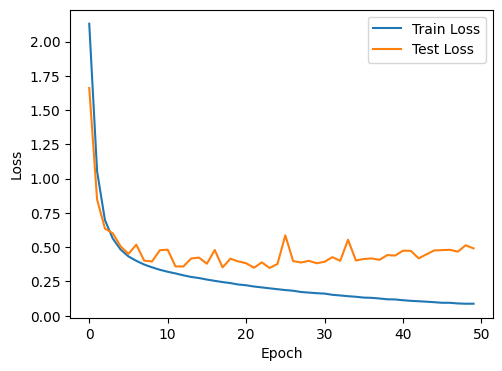

In [ ]:
import matplotlib.pyplot as plt

# Increase model capacity by incresing number of layers and units
overfit_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, out_size)
)

overfit_optimizer = torch.optim.SGD(overfit_model.parameters(), lr=0.01)  # Decrease learning rate

# Train for more epochs
overfit_epochs = 50

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for e in range(overfit_epochs):
    overfit_model.train()
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        overfit_optimizer.zero_grad()
        output = overfit_model(images)
        loss = criterion(output, labels)
        loss.backward()
        overfit_optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    # Test the model
    test_loss, test_accuracy = test(overfit_model, testloader)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {e+1}/{overfit_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Plot the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.show()


## پ


Epoch 1/50, Train Loss: 2.3029, Test Loss: 2.2996
Epoch 2/50, Train Loss: 2.2914, Test Loss: 2.2707
Epoch 3/50, Train Loss: 2.0681, Test Loss: 1.6078
Epoch 4/50, Train Loss: 1.3458, Test Loss: 1.2176
Epoch 5/50, Train Loss: 1.1127, Test Loss: 1.0050
Epoch 6/50, Train Loss: 0.9595, Test Loss: 0.9186
Epoch 7/50, Train Loss: 0.8650, Test Loss: 0.8974
Epoch 8/50, Train Loss: 0.8094, Test Loss: 0.7727
Epoch 9/50, Train Loss: 0.7702, Test Loss: 0.8525
Epoch 10/50, Train Loss: 0.7433, Test Loss: 0.7395
Epoch 11/50, Train Loss: 0.7174, Test Loss: 0.7607
Epoch 12/50, Train Loss: 0.6959, Test Loss: 0.7171
Epoch 13/50, Train Loss: 0.6791, Test Loss: 0.6523
Epoch 14/50, Train Loss: 0.6654, Test Loss: 0.7940
Epoch 15/50, Train Loss: 0.6528, Test Loss: 0.7044
Epoch 16/50, Train Loss: 0.6370, Test Loss: 0.6285
Epoch 17/50, Train Loss: 0.6269, Test Loss: 0.6286
Epoch 18/50, Train Loss: 0.6115, Test Loss: 0.6507
Epoch 19/50, Train Loss: 0.5970, Test Loss: 0.6311
Epoch 20/50, Train Loss: 0.5833, Test Lo

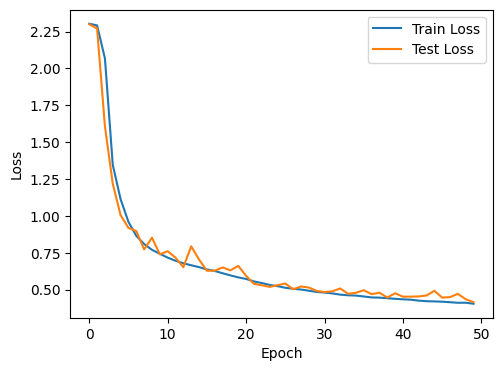

In [ ]:
# Define data transformations and apply augmentation
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
])

# Define data transformations for testing (no augmentation)
transform_test = transforms.Compose([
    transforms.ToTensor(),
])

# Load FashionMNIST dataset with transformations
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform_train)
testset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform_test)

# Create data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

overfit_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, out_size)
)
overfit_optimizer = torch.optim.SGD(overfit_model.parameters(), lr=0.01)

overfit_epochs = 50

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for e in range(overfit_epochs):
    overfit_model.train()
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        overfit_optimizer.zero_grad()
        output = overfit_model(images)
        loss = criterion(output, labels)
        loss.backward()
        overfit_optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    # Test the model
    test_loss, test_accuracy = test(overfit_model, testloader)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {e+1}/{overfit_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Plot the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.show()

# ت

Epoch 1/50, Train Loss: 2.3015, Test Loss: 2.2982
Epoch 2/50, Train Loss: 2.2919, Test Loss: 2.2791
Epoch 3/50, Train Loss: 2.0918, Test Loss: 1.4995
Epoch 4/50, Train Loss: 1.2287, Test Loss: 1.1151
Epoch 5/50, Train Loss: 0.9955, Test Loss: 0.8901
Epoch 6/50, Train Loss: 0.8566, Test Loss: 0.8007
Epoch 7/50, Train Loss: 0.7828, Test Loss: 0.7411
Epoch 8/50, Train Loss: 0.7259, Test Loss: 0.6891
Epoch 9/50, Train Loss: 0.6818, Test Loss: 0.6528
Epoch 10/50, Train Loss: 0.6482, Test Loss: 0.6778
Epoch 11/50, Train Loss: 0.6151, Test Loss: 0.5936
Epoch 12/50, Train Loss: 0.5870, Test Loss: 0.6104
Epoch 13/50, Train Loss: 0.5612, Test Loss: 0.5539
Epoch 14/50, Train Loss: 0.5383, Test Loss: 0.5801
Epoch 15/50, Train Loss: 0.5181, Test Loss: 0.5383
Epoch 16/50, Train Loss: 0.4990, Test Loss: 0.5444
Epoch 17/50, Train Loss: 0.4858, Test Loss: 0.4860
Epoch 18/50, Train Loss: 0.4732, Test Loss: 0.4850
Epoch 19/50, Train Loss: 0.4613, Test Loss: 0.4609
Epoch 20/50, Train Loss: 0.4509, Test Lo

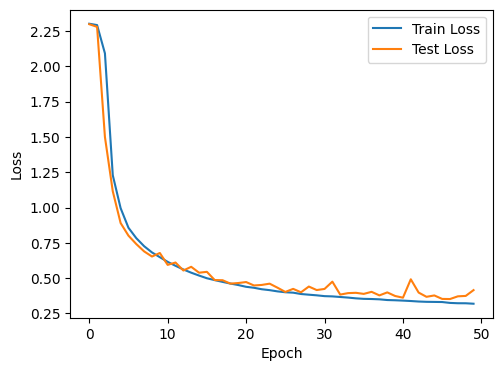

In [ ]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define a new model with increased regularization (L2)
regularized_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, out_size)
)

# Set the regularization strength (l2_lambda)
l2_lambda = 0.001

# Define the loss function with L2 regularization
criterion_l2 = nn.CrossEntropyLoss()

# Define the optimizer with L2 regularization
optimizer_l2 = optim.SGD(regularized_model.parameters(), lr=0.001, weight_decay=l2_lambda)  # Use weight_decay for L2 regularization

# Train for more epochs
regularized_epochs = 50

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for e in range(regularized_epochs):
    regularized_model.train()
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer_l2.zero_grad()
        output = regularized_model(images)
        loss = criterion_l2(output, labels)
        loss.backward()
        optimizer_l2.step()
        running_loss += loss.item()
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    # Test the model
    test_loss, test_accuracy = test(regularized_model, testloader)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {e+1}/{regularized_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Plot the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# ث

Epoch 1/50, Train Loss: 2.3033, Test Loss: 2.2990
Epoch 2/50, Train Loss: 2.2879, Test Loss: 2.2596
Epoch 3/50, Train Loss: 1.9493, Test Loss: 1.6267
Epoch 4/50, Train Loss: 1.4806, Test Loss: 1.3754
Epoch 5/50, Train Loss: 1.3037, Test Loss: 1.2399
Epoch 6/50, Train Loss: 1.1863, Test Loss: 1.1500
Epoch 7/50, Train Loss: 1.1104, Test Loss: 1.0932
Epoch 8/50, Train Loss: 1.0489, Test Loss: 1.0159
Epoch 9/50, Train Loss: 0.9948, Test Loss: 0.9591
Epoch 10/50, Train Loss: 0.9253, Test Loss: 0.9102
Epoch 11/50, Train Loss: 0.8610, Test Loss: 0.8379
Epoch 12/50, Train Loss: 0.8193, Test Loss: 0.8116
Epoch 13/50, Train Loss: 0.7806, Test Loss: 0.7756
Epoch 14/50, Train Loss: 0.7490, Test Loss: 0.7246
Epoch 15/50, Train Loss: 0.7210, Test Loss: 0.7233
Epoch 16/50, Train Loss: 0.6996, Test Loss: 0.6834
Epoch 17/50, Train Loss: 0.6786, Test Loss: 0.6741
Epoch 18/50, Train Loss: 0.6605, Test Loss: 0.6600
Epoch 19/50, Train Loss: 0.6468, Test Loss: 0.6329
Epoch 20/50, Train Loss: 0.6310, Test Lo

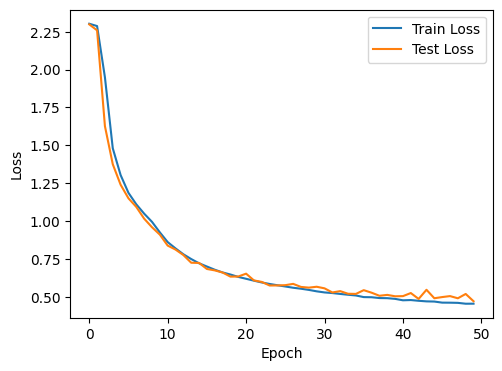

In [103]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the model with L2 regularization and dropout
regularized_model_final = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, 512, bias=True),
    nn.ReLU(),
    nn.Dropout(0.2),  # Adding dropout after the first ReLU
    nn.Linear(512, 256, bias=True),
    nn.ReLU(),
    nn.Dropout(0.2),  # Adding dropout after the second ReLU
    nn.Linear(256, 128, bias=True),
    nn.ReLU(),
    nn.Dropout(0.2),  # Adding dropout after the third ReLU
    nn.Linear(128, 64, bias=True),
    nn.ReLU(),
    nn.Dropout(0.2),  # Adding dropout after the fourth ReLU
    nn.Linear(64, 32, bias=True),
    nn.ReLU(),
    nn.Dropout(0.2),  # Adding dropout after the fifth ReLU
    nn.Linear(32, out_size, bias=True)
)

# Use data augmentation for training data
transform_final = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

# Load FashionMNIST dataset with transformations
trainset_final = datasets.FashionMNIST('./data', download=True, train=True, transform=transform_final)

# Create data loaders
trainloader = torch.utils.data.DataLoader(trainset_final, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)



# Update optimizer with weight decay for L2 regularization
regularized_optimizer_final = torch.optim.SGD(regularized_model_final.parameters(), lr=0.01, weight_decay=0.001)  # Adjusted learning rate

# Train for more epochs
regularized_epochs_final = 50

train_losses_final = []
test_losses_final = []
train_accuracies_final = []
test_accuracies_final = []

for e_final in range(regularized_epochs_final):
    regularized_model_final.train()
    running_loss_final = 0
    for images_final, labels_final in trainloader:
        images_final = images_final.view(images_final.shape[0], -1)
        regularized_optimizer_final.zero_grad()
        output_final = regularized_model_final(images_final)
        loss_final = criterion(output_final, labels_final)
        loss_final.backward()
        regularized_optimizer_final.step()
        running_loss_final += loss_final.item()
    train_loss_final = running_loss_final / len(trainloader)
    train_losses_final.append(train_loss_final)

    # Test the model
    test_loss_final, test_accuracy_final = test(regularized_model_final, testloader)
    test_losses_final.append(test_loss_final)
    test_accuracies_final.append(test_accuracy_final)

    print(f"Epoch {e_final+1}/{regularized_epochs_final}, Train Loss: {train_loss_final:.4f}, Test Loss: {test_loss_final:.4f}")

# Plot the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses_final, label='Train Loss')
plt.plot(test_losses_final, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
